[@LorenaABarba](https://twitter.com/LorenaABarba)

Forked and modified by Brian Sheng: https://github.com/BugBiteSquared

12 steps to Navier-Stokes
======
***

This IPython notebook continues the presentation of the **12 steps to Navier-Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2: Non-linear Convection
-----
***

Now we're going to implement non-linear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*  We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [104]:
import numpy                 #we're importing numpy and calling it np locally
from matplotlib import pyplot    #and our 2D plotting library, calling it plt
%matplotlib inline


nx = 41
dx = 2 / (nx - 1)
nt = 100    #nt is the number of timesteps we want to calculate (changed to 50)
dt = .005  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

The code snippet below is *unfinished*. We have copied over the line from [Step 1](./01_Step_1.ipynb) that executes the time-stepping update. Can you edit this code to execute the non-linear convection instead?

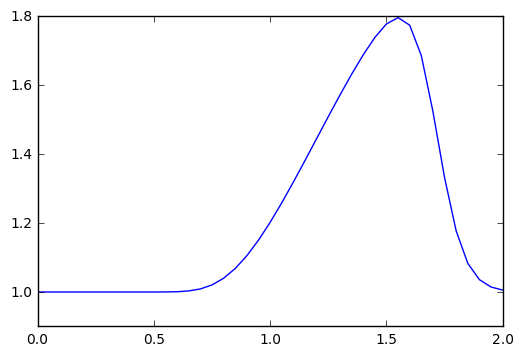

In [105]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
    
         ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
         ###then uncomment it and run the cell to evaluate Step 2   
      
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])#edited
        #I also adjusted the number of timesteps and delta t to get a better plot.

        
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

What do you observe about the evolution of the hat function under the non-linear convection equation? What happens when you change the numerical parameters and run again?

There's a sort of accumulation effect happening with the motion of the function.
The "hat" tips to the right due the right due to larger function values creating larger propagation speeds.
That means the peak of the lump will try to move faster than the rest of the lump.

## Learn More

For a careful walk-through of the discretization of the convection equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

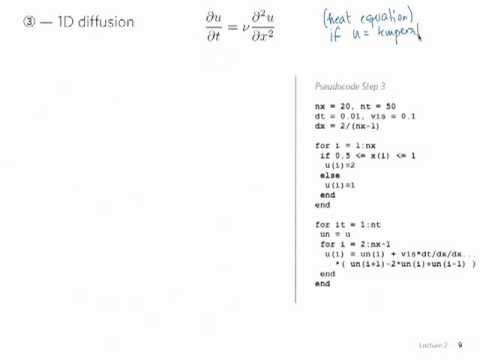

In [80]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [81]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)